In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from qucat import Network,GUI,L,J,C,R

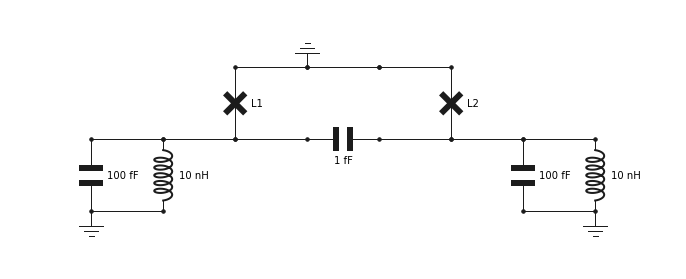

In [6]:
# Build circuit
exp4 = GUI('circuits/exp4.txt', 
        edit=True, 
        plot=True, 
        print_network=False) 

In [7]:
H = exp4.hamiltonian(
    modes = [0,1],
    taylor = 2,
    excitations = [8,10],
    L1= 9e-9, L2= 10e-9)
ee = H.eigenenergies()

In [8]:
first_transition = ee[1]-ee[0]
print("%.3f GHz"%((first_transition)/1e9))

7.076 GHz


In [11]:
H,a_m_list = exp4.hamiltonian(modes = [0,0],taylor = 4,excitations = [5,5],L1= 8e-9, L2= 8e-9,
    return_ops = True)  
H = 2.*np.pi*H
k = exp4.loss_rates(L1= 8e-9, L2= 8e-9)
c_ops = [np.sqrt(2*np.pi*k[0])*a_m_list[0],np.sqrt(2*np.pi*k[0])*a_m_list[1]]

In [17]:
exp4.eigenfrequencies(L1= 8e-9, L2= 8e-9)

array([7.47500186e+09, 7.54938182e+09])

In [18]:
exp4.anharmonicities(L1= 8e-9, L2= 8e-9)

array([52751169.19144207, 53806192.57527065])

In [19]:
K = exp4.kerr(L1= 8e-9, L2= 8e-9)
print("%.2f kHz"%(K[0,0]/1e3))

52751.17 kHz


In [20]:
A = exp4.anharmonicities(L1= 8e-9, L2= 8e-9)
print("%.2f kHz"%(2*np.sqrt(A[0]*A[0])/1e3))

105502.34 kHz


In [21]:
exp4.loss_rates(L1= 8e-9, L2= 8e-9)

array([0., 0.])

In [22]:
T_1 = 1/exp4.loss_rates(L1= 8e-9, L2= 8e-9)/2/np.pi
print(T_1)

[inf inf]


C:\Users\nithi\AppData\Local\Temp\ipykernel_3372\2919718394.py:1: RuntimeWarning: divide by zero encountered in true_divide
  T_1 = 1/exp4.loss_rates(L1= 8e-9, L2= 8e-9)/2/np.pi


In [23]:
exp4.f_k_A_chi(L1= 8e-9, L2= 8e-9)

(array([7.47500186e+09, 7.54938182e+09]),
 array([0., 0.]),
 array([52751169.19144207, 53806192.57527065]),
 array([[5.27511692e+07, 1.06552139e+08],
        [1.06552139e+08, 5.38061926e+07]]))

In [24]:
f,k,A,chi = exp4.f_k_A_chi(pretty_print=True,L1= 8e-9, L2= 8e-9)

         mode |       freq.  |       diss.  |       anha.  |
            0 |     7.48 GHz |          0Hz |     52.8 MHz |
            1 |     7.55 GHz |          0Hz |     53.8 MHz |

Kerr coefficients (diagonal = Kerr, off-diagonal = cross-Kerr)
         mode |         0    |         1    |
            0 |     52.8 MHz |              |
            1 |      107 MHz |     53.8 MHz |



C:\Users\nithi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\nithi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


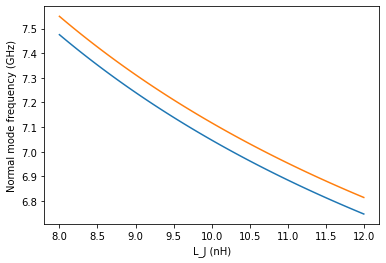

In [26]:
L1_list = np.linspace(8e-9,12e-9,101)
L2_list = np.linspace(8e-9,12e-9,101)

# Eigen-frequencies of the system:
freqs = exp4.eigenfrequencies(L1=L1_list,L2=L2_list)

# plot first mode
plt.plot(L1_list*1e9,freqs[0]/1e9)
plt.plot(L1_list*1e9,freqs[1]/1e9)


# Add labels
plt.xlabel('L_J (nH)')
plt.ylabel('Normal mode frequency (GHz)')

# show the figure
plt.show()

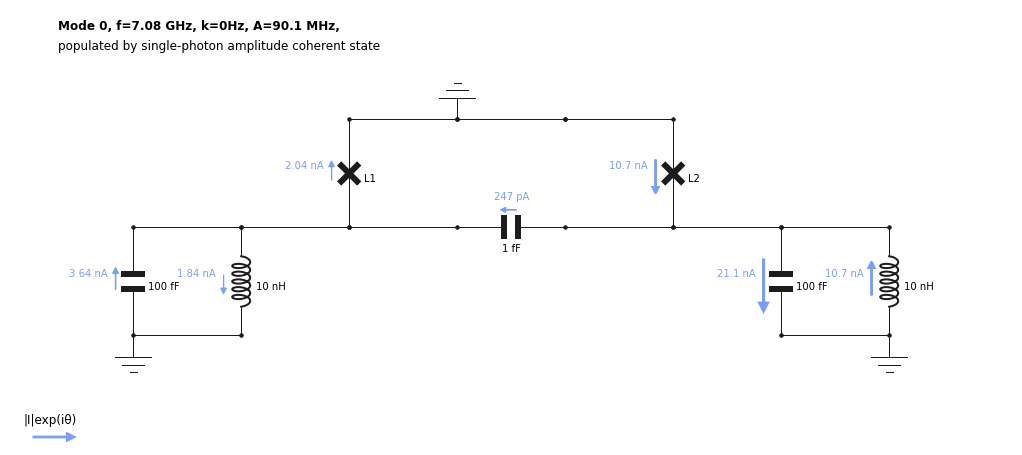

In [28]:
exp4.show_normal_mode(mode=0,quantity='current',L1= 9e-9, L2= 10e-9)


In [31]:
print(exp4.components['L1'].zpf(mode = 0, quantity = 'current',L1= 9e-9, L2= 10e-9))

(-2.044589430121326e-09+0j)


In [32]:
exp4.hamiltonian(modes = [0,1],taylor = 2,excitations = [5,5], L1= 9e-9, L2= 10e-9,
    return_ops = False)

Quantum object: dims = [[5, 5], [5, 5]], shape = (25, 25), type = oper, isherm = True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 7.28294574e+09 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.45658915e+10 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+0